1. Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).

2019-03
2019-04
2019-05
2019-06
2019-12


C:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


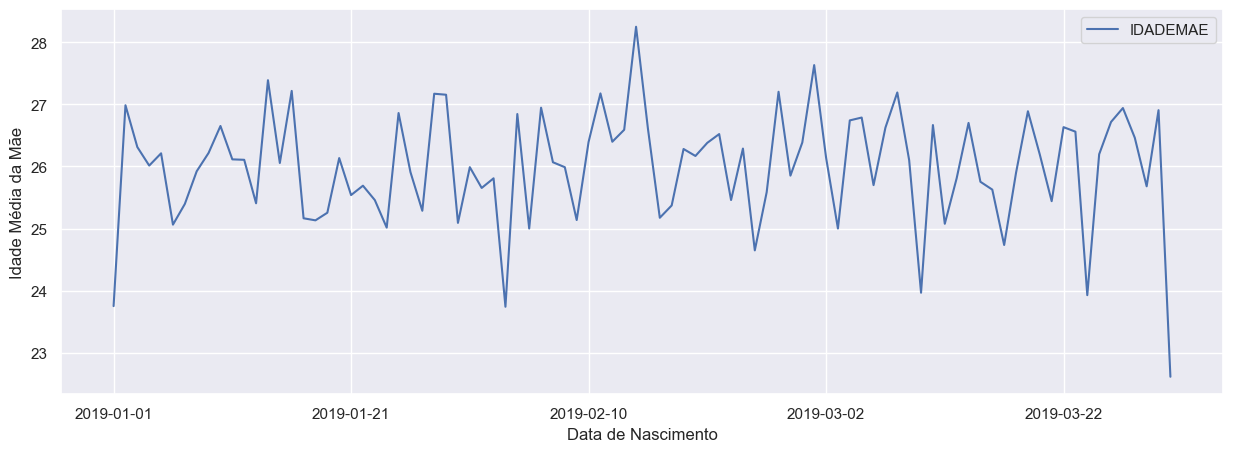

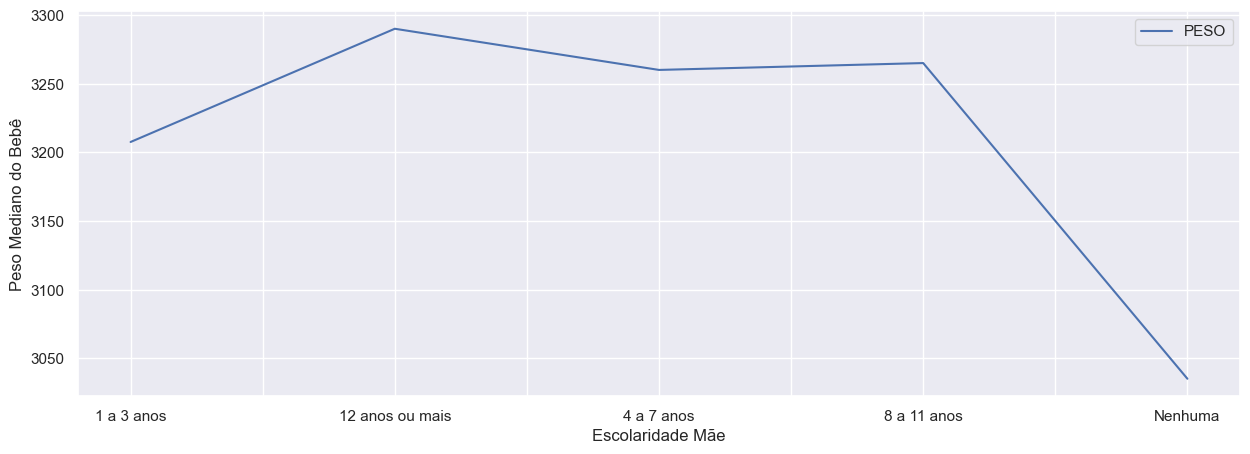

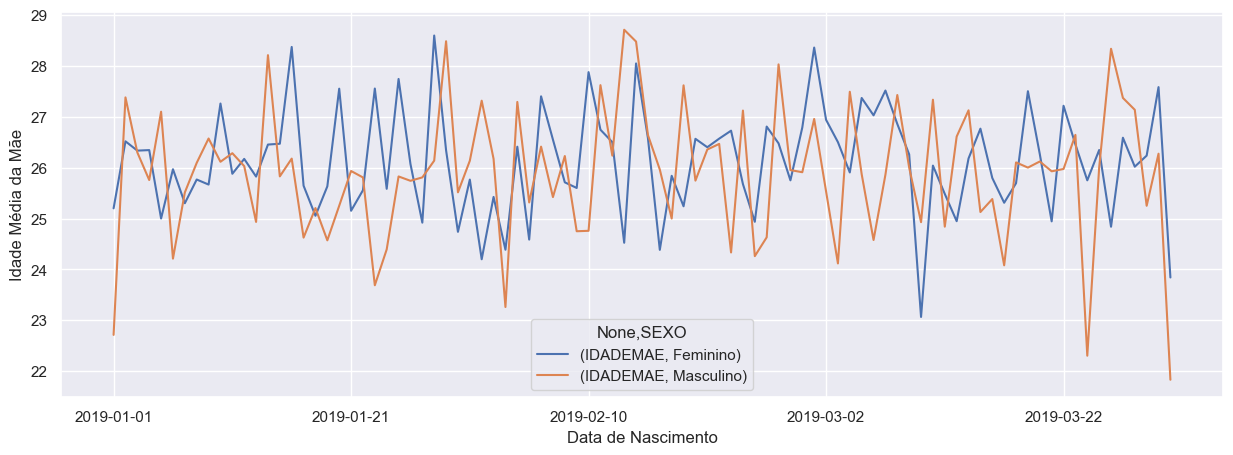

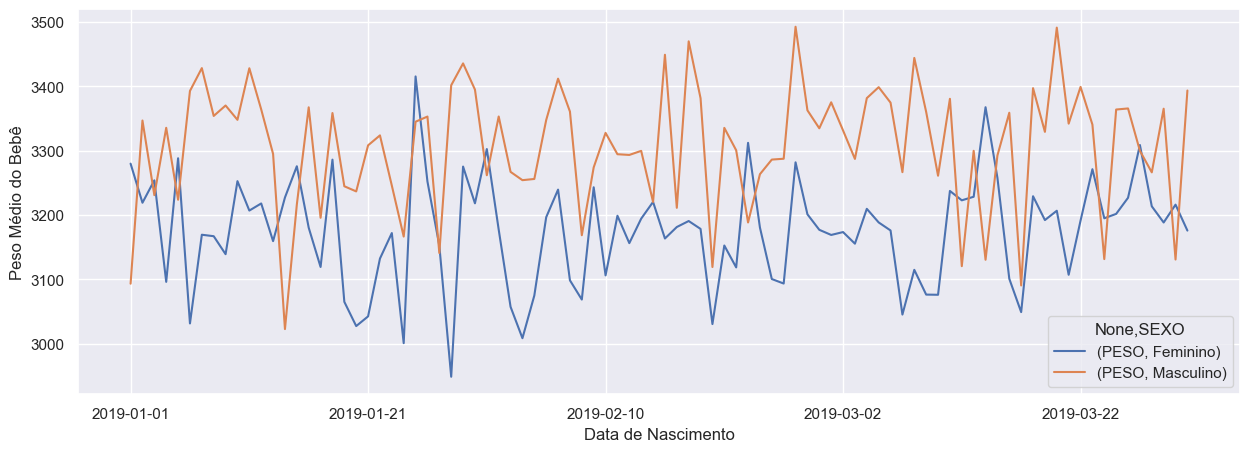

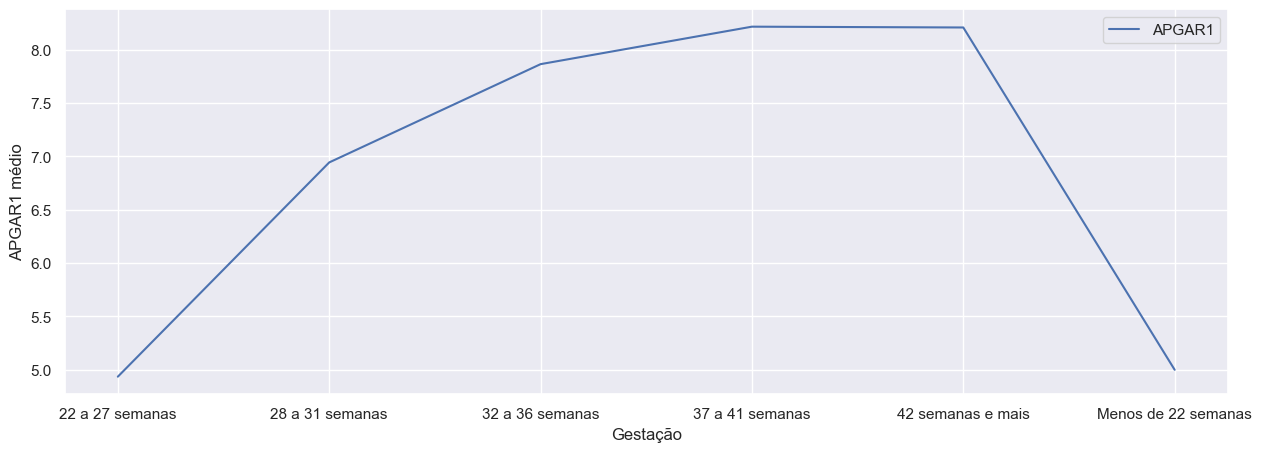

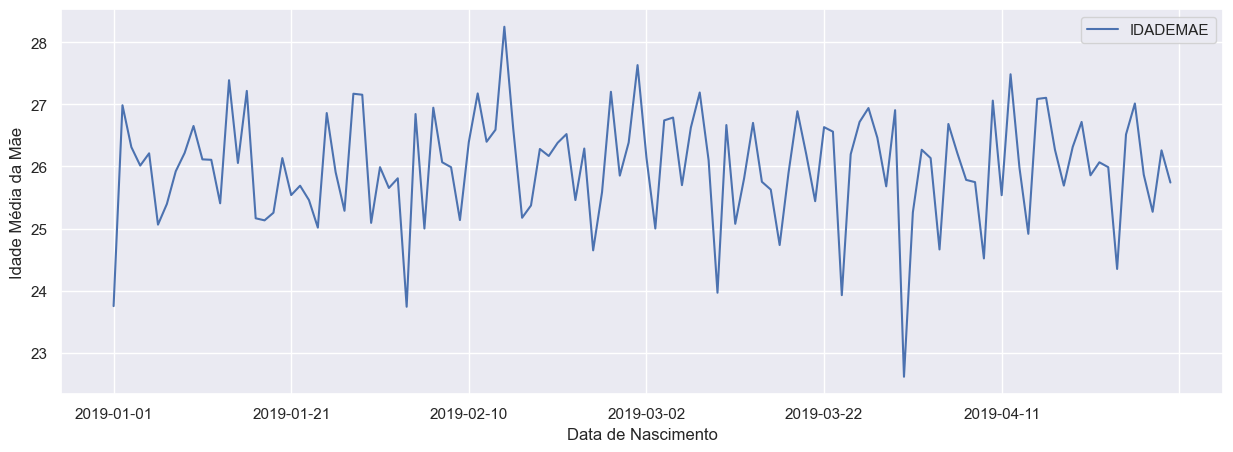

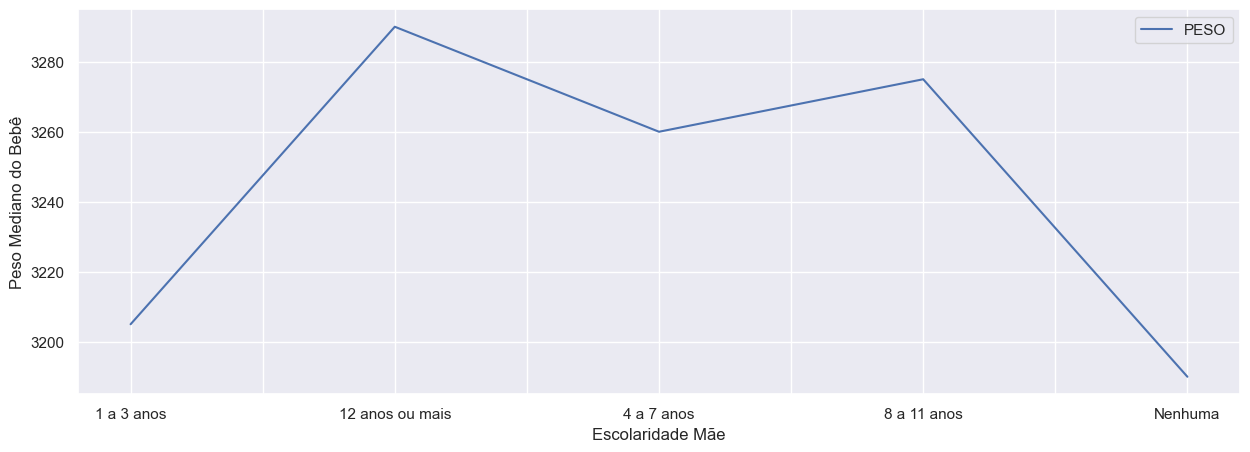

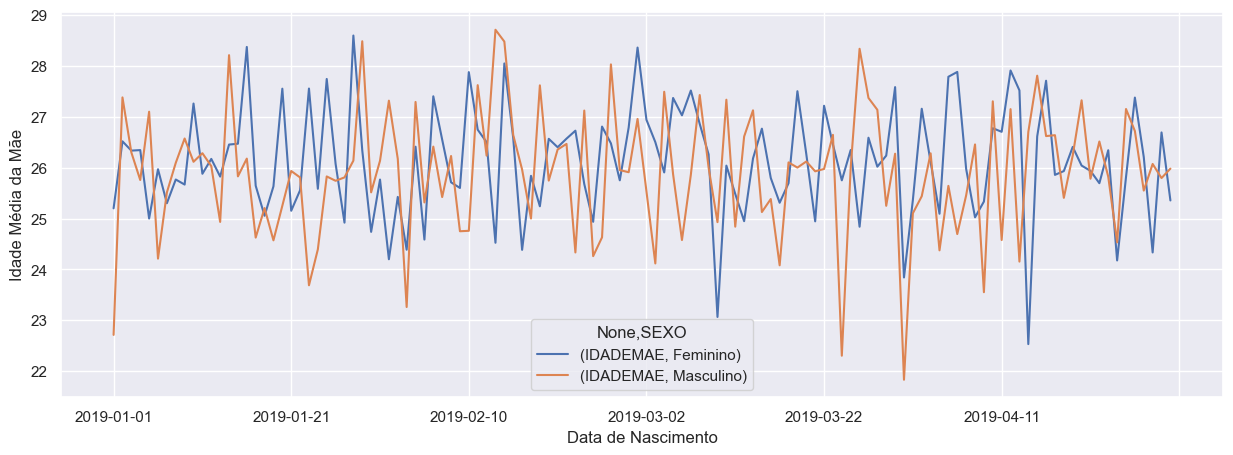

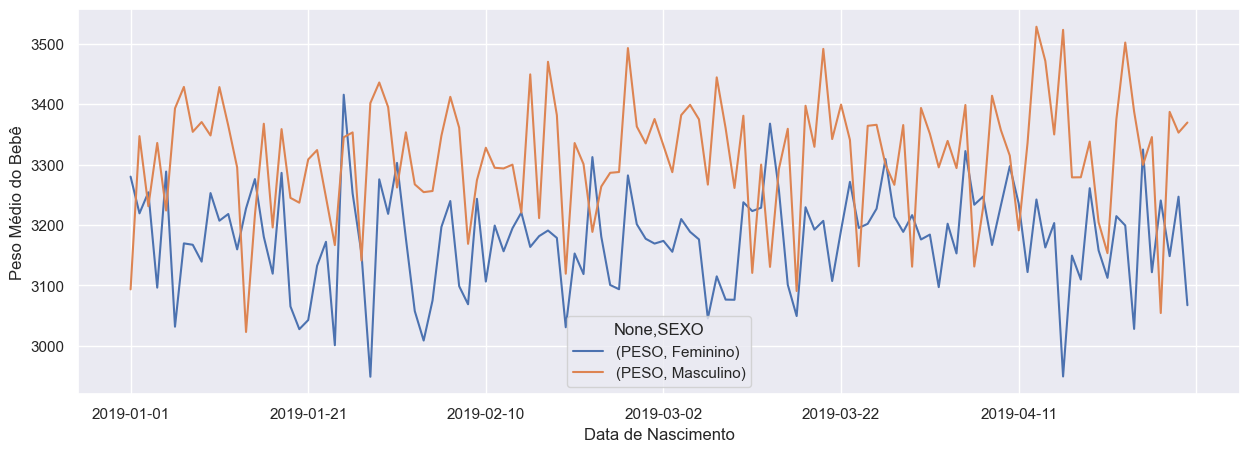

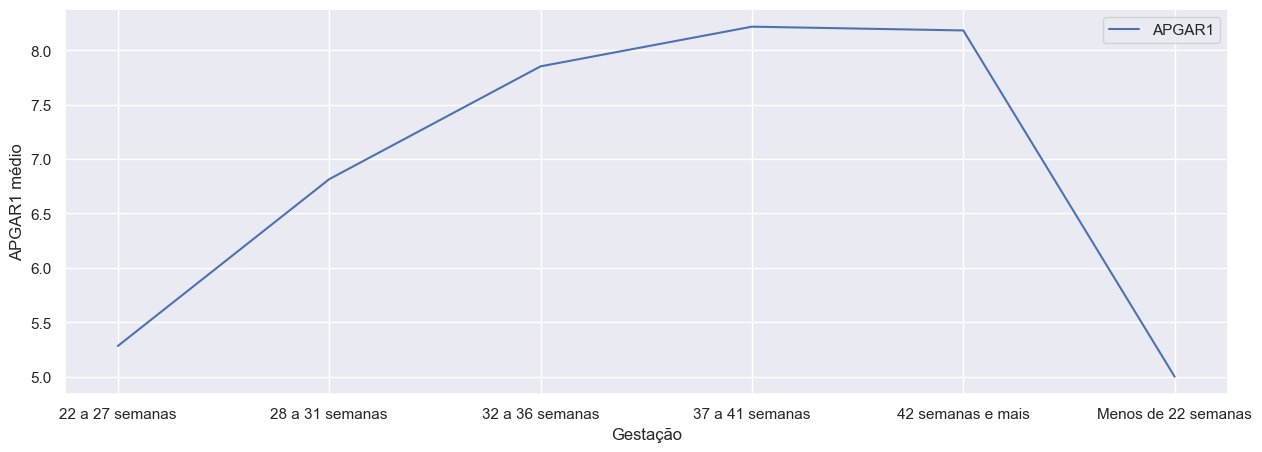

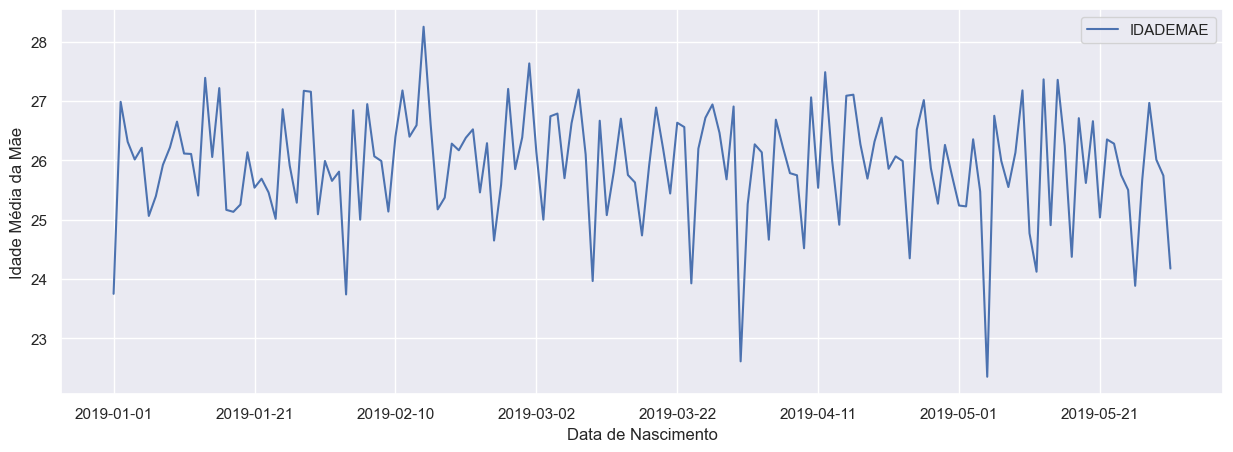

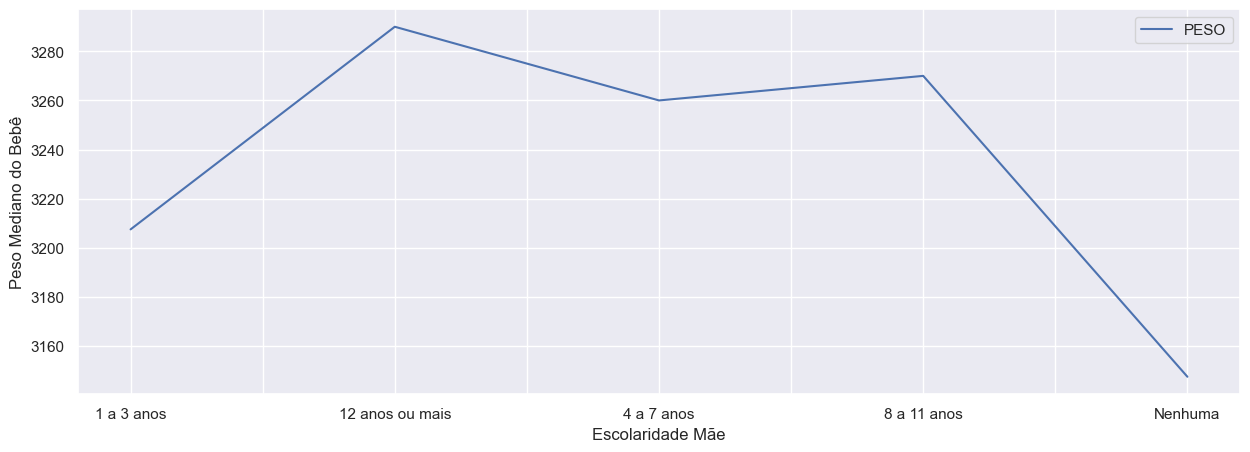

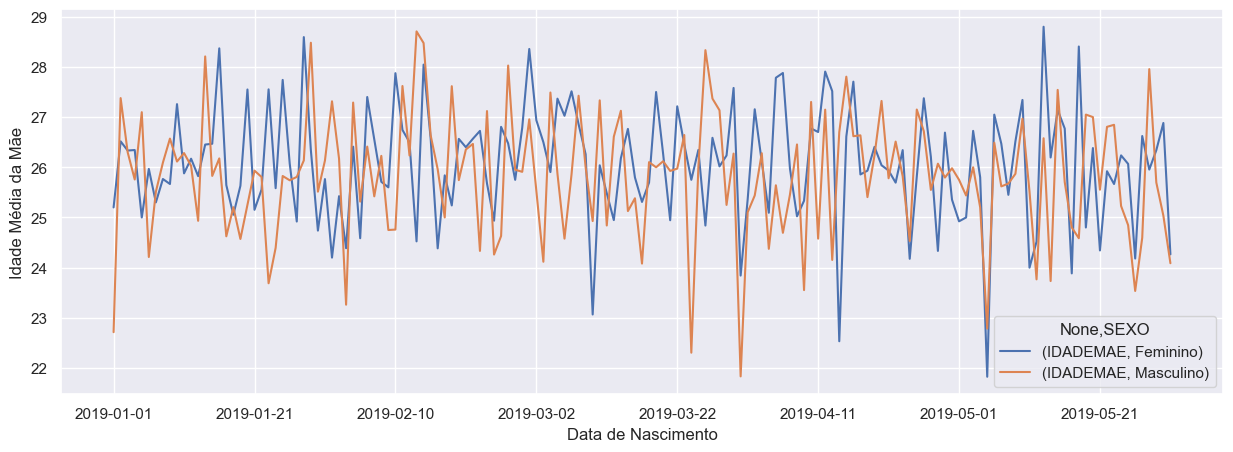

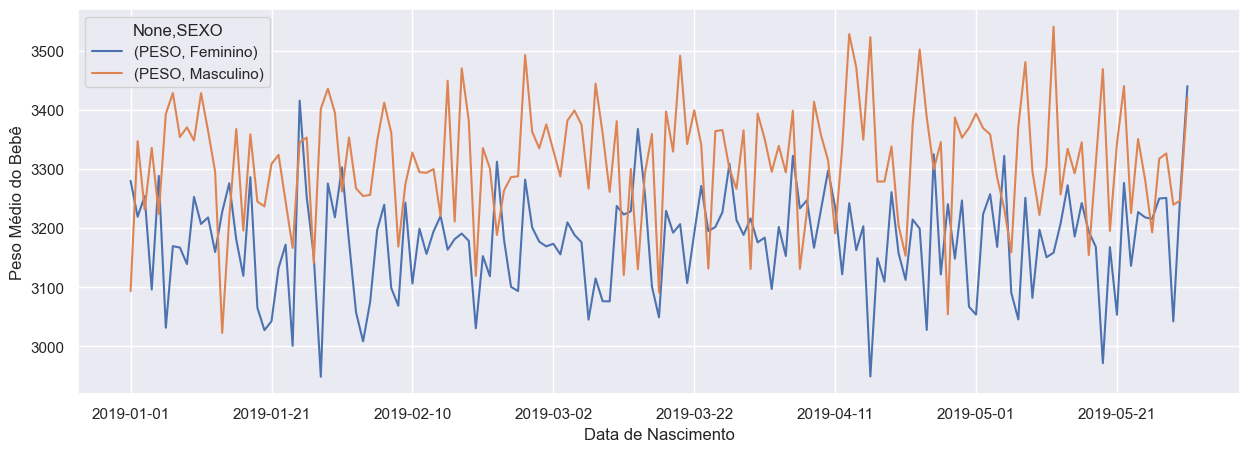

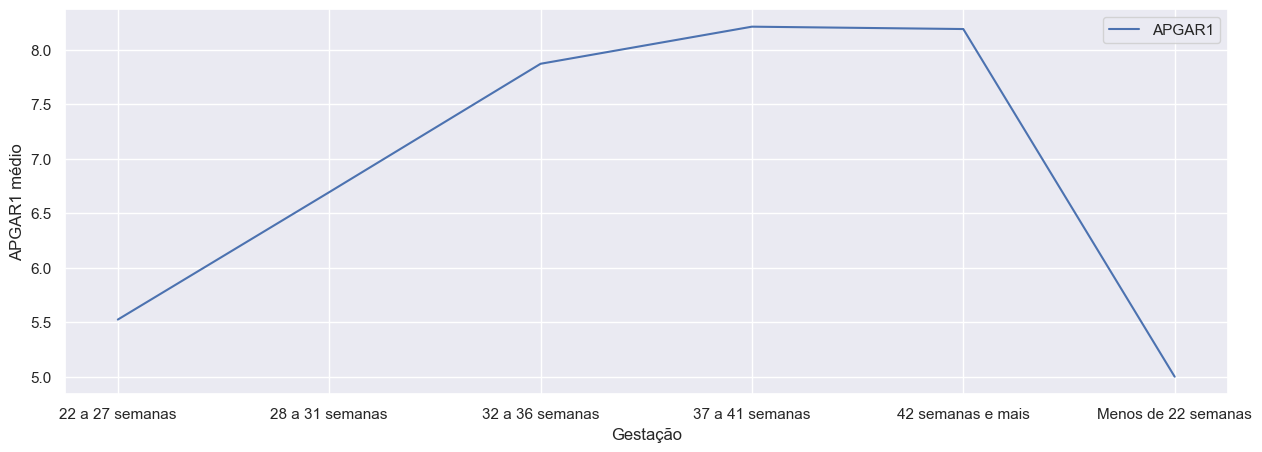

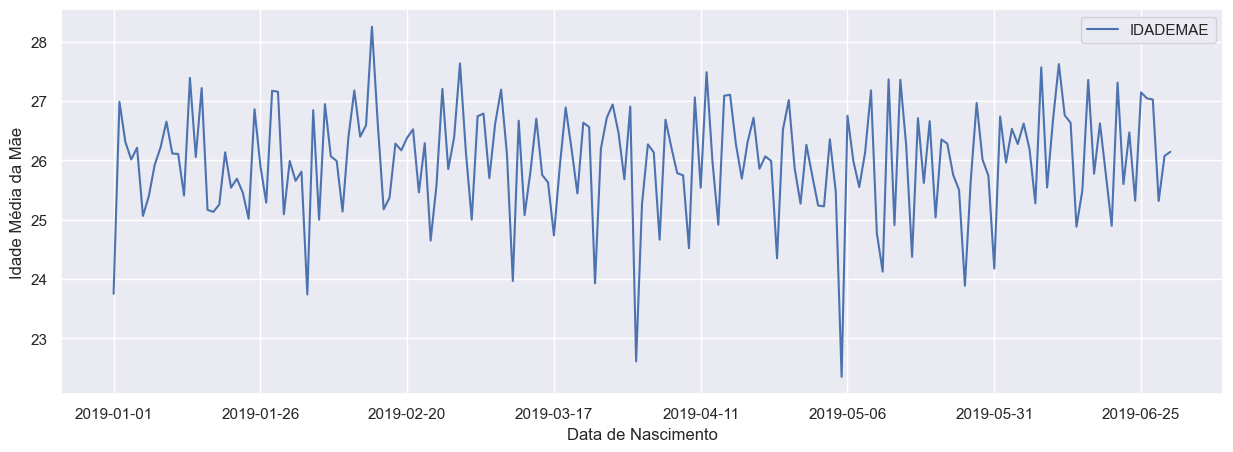

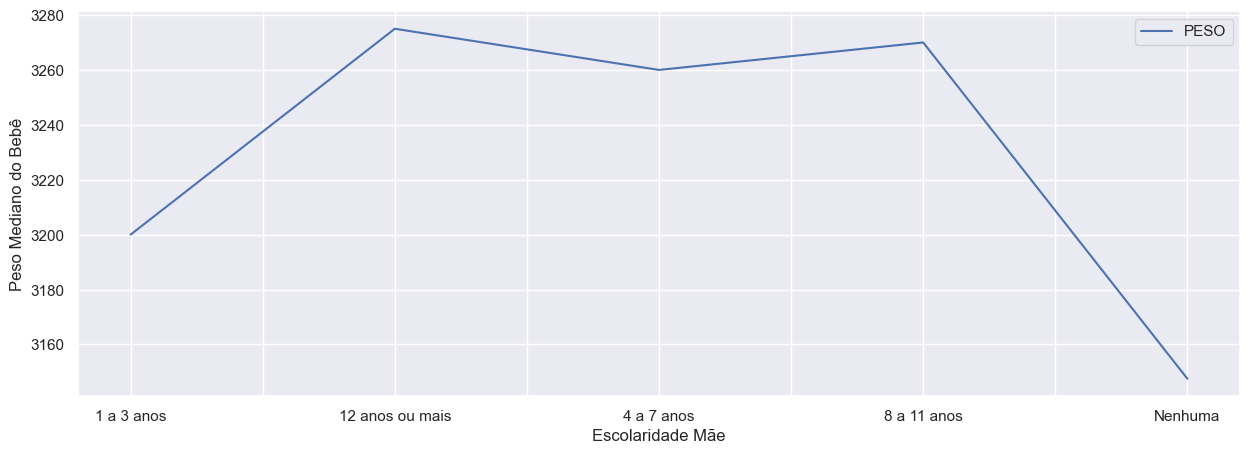

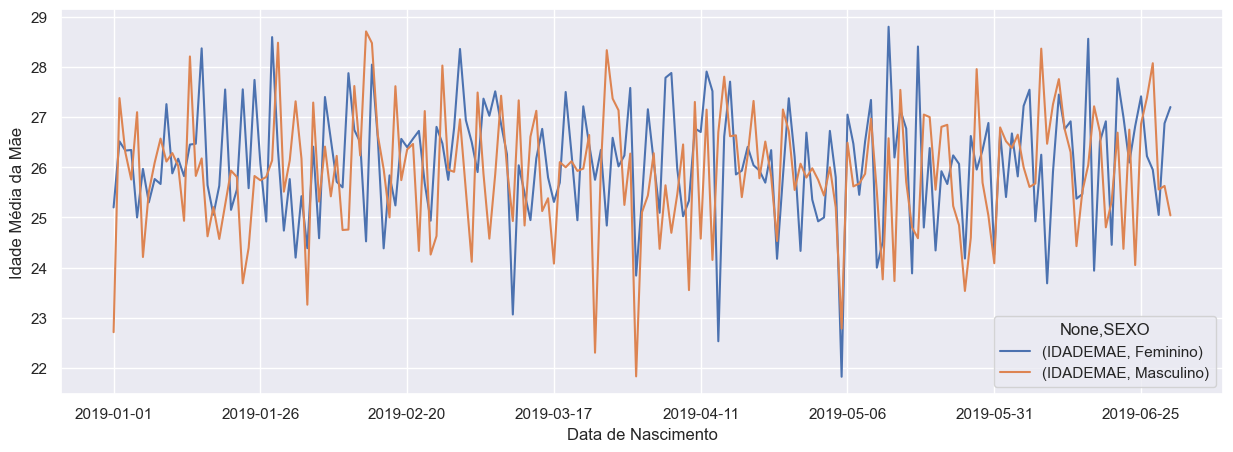

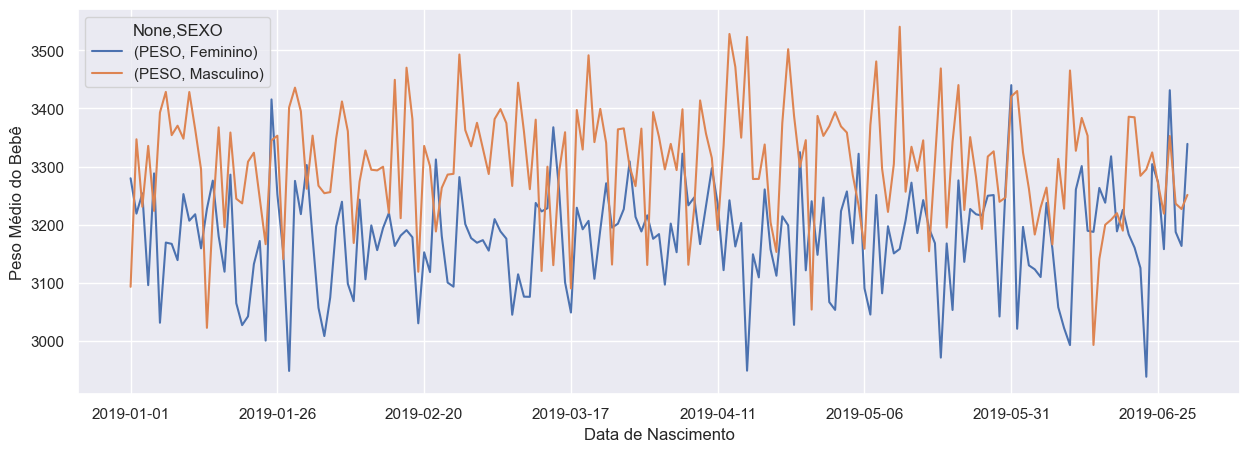

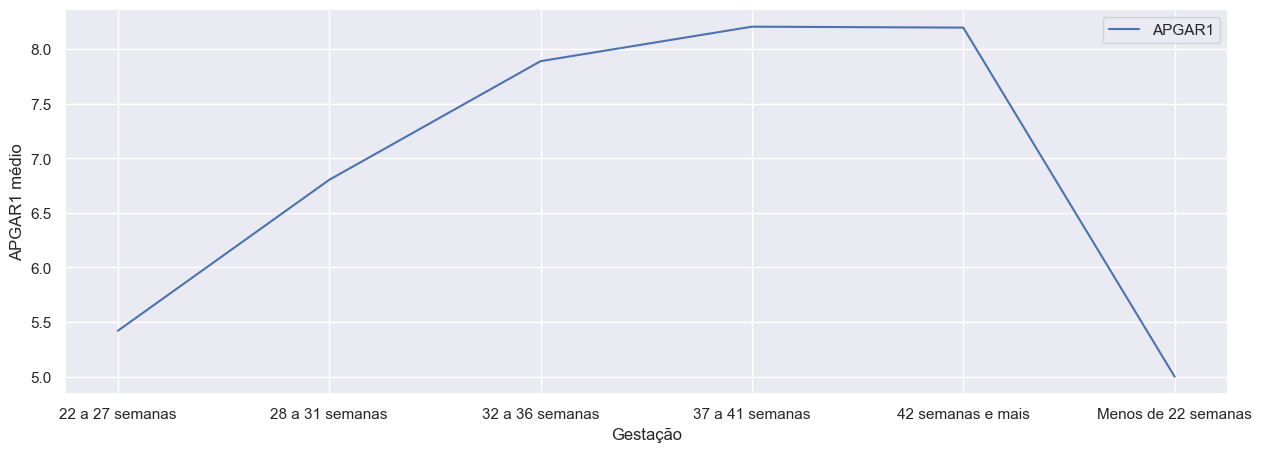

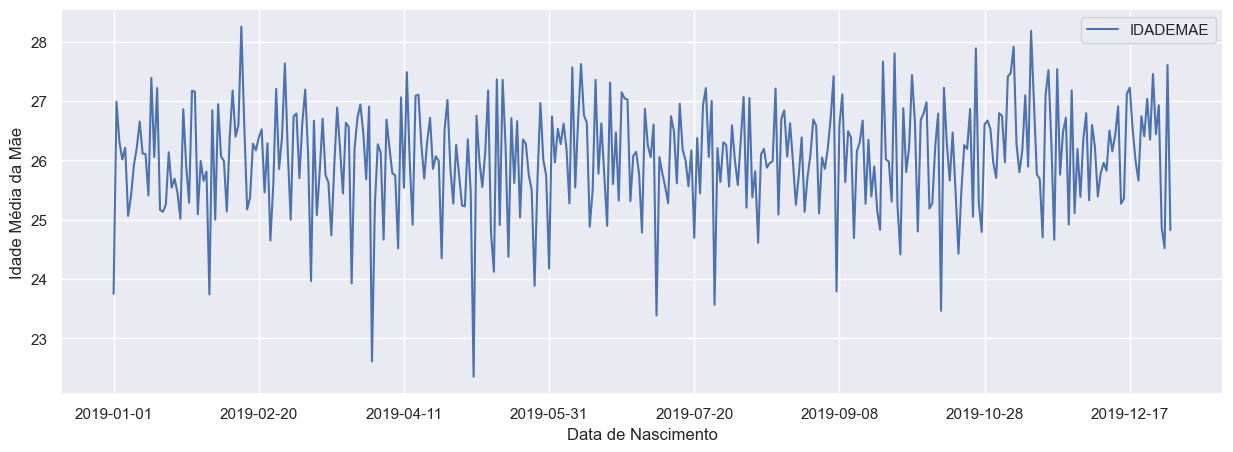

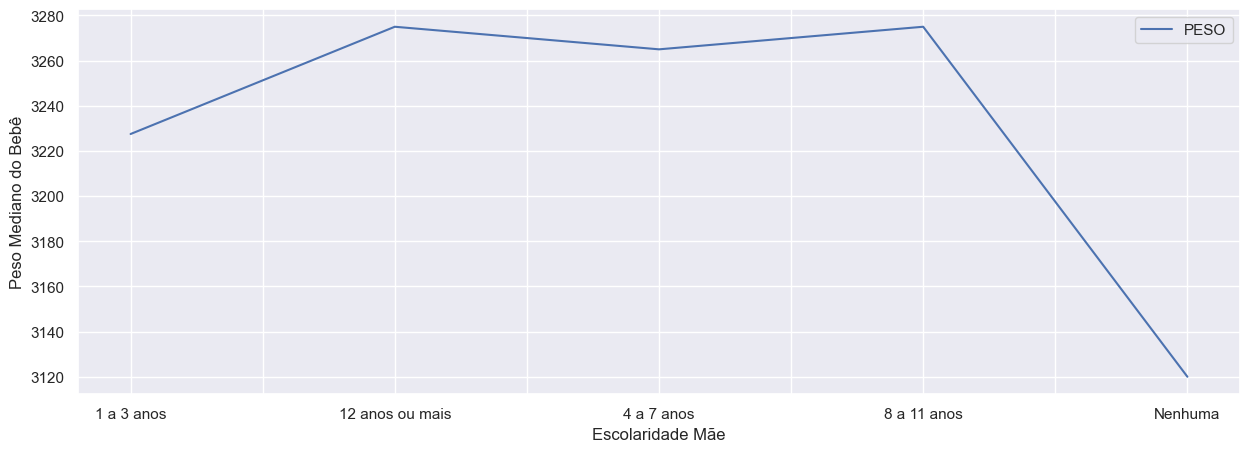

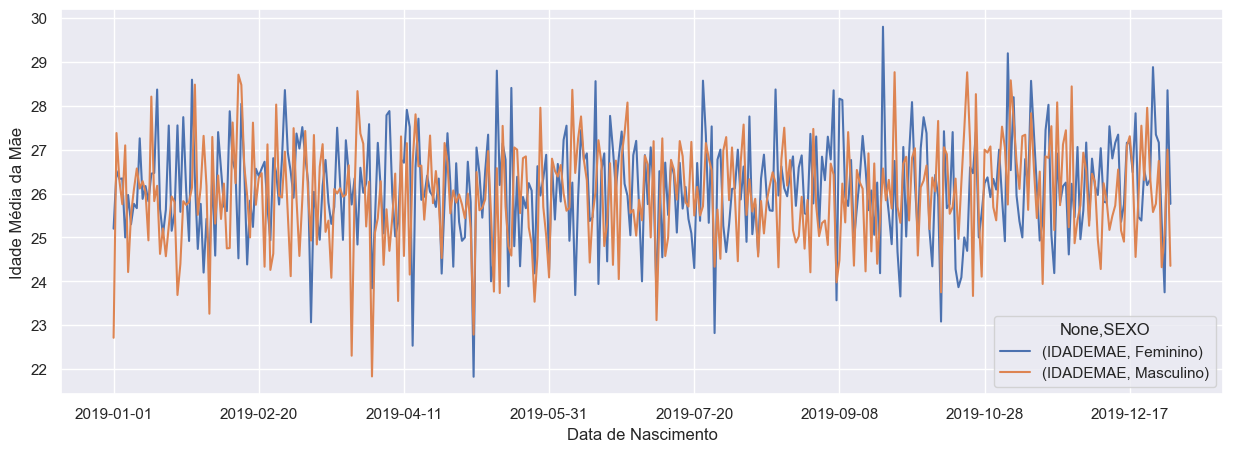

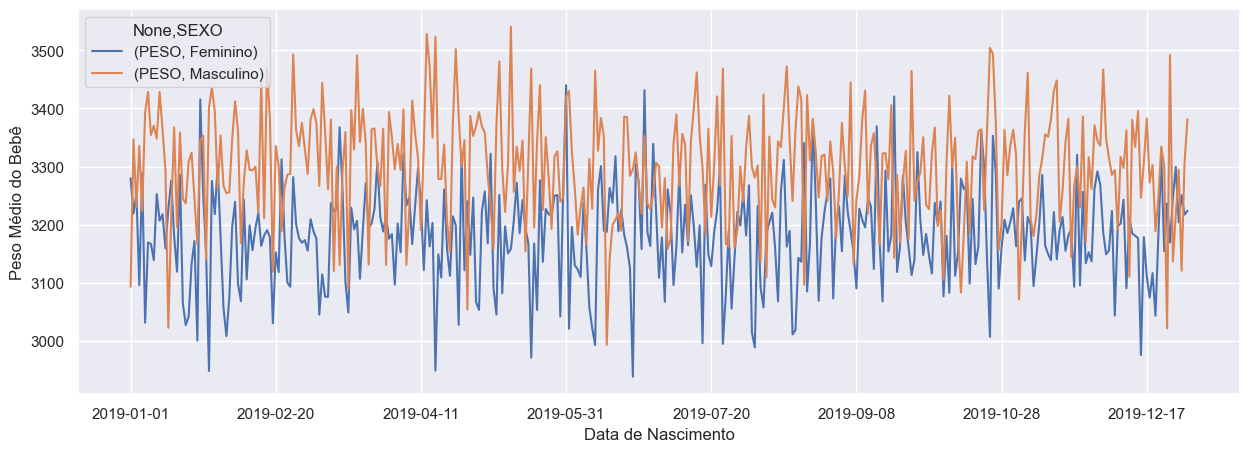

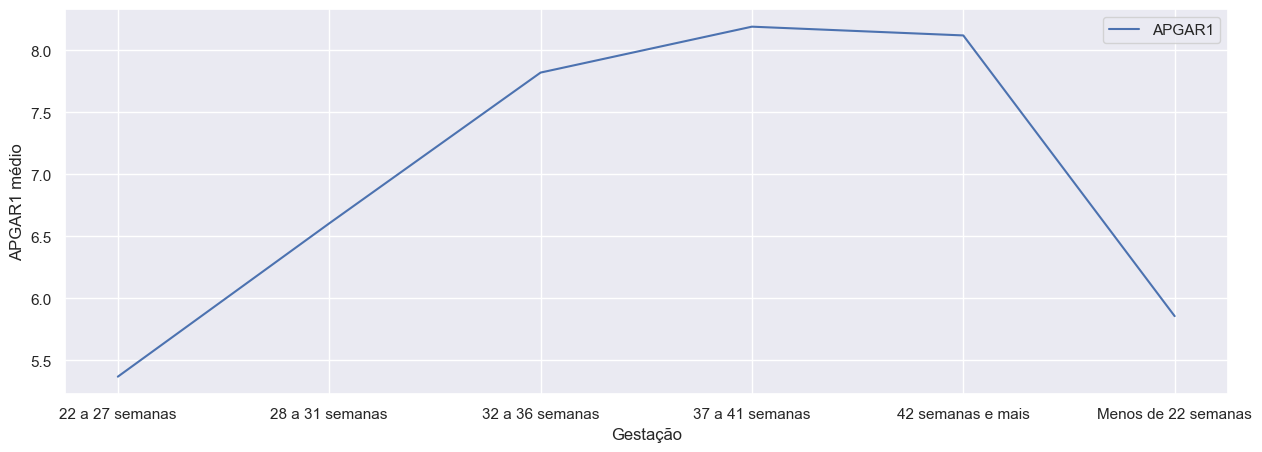

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

sns.set_theme()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao = "nada", sort_col = None):
    if opcao == "nada":
        pd.pivot_table(df, values = value, index = index, aggfunc = func).plot(figsize = [15, 5])
    elif opcao == "unstack":
        pd.pivot_table(df, values = value, index = index, aggfunc = func).unstack().plot(figsize = [15, 5])
    elif opcao == "sort_by_col":
        df = pd.pivot_table(df, values = value, index = index, aggfunc = func)
        if sort_col:
            df.sort_values(by = sort_col, inplace = True)
        df.plot(figsize = [15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

# Lista de meses selecionados no enunciado a serem processados pelo script
meses = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

for mes in meses:
    sinasc = pd.read_csv(f"./input/SINASC_RO_2019_{mes}.csv")
    
    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)
    
    output_dir = f"./output/figs/{max_data}"
    os.makedirs(output_dir, exist_ok = True)

    plota_pivot_table(sinasc, "IDADEMAE", "DTNASC", "mean", "Idade Média da Mãe", "Data de Nascimento")
    plt.savefig(os.path.join(output_dir, "idade_mae_media_por_data.png"))
    
    plota_pivot_table(sinasc, "PESO", "ESCMAE", "median", "Peso Mediano do Bebê", "Escolaridade Mãe", "sort_by_col", sort_col = "ESCMAE")
    plt.savefig(os.path.join(output_dir, "peso_mediano_por_escolaridade.png"))

    plota_pivot_table(sinasc, "IDADEMAE", ["DTNASC", "SEXO"], "mean", "Idade Média da Mãe", "Data de Nascimento", "unstack")
    plt.savefig(os.path.join(output_dir, "idade_mae_media_por_sexo.png"))

    plota_pivot_table(sinasc, "PESO", ["DTNASC", "SEXO"], "mean", "Peso Médio do Bebê", "Data de Nascimento", "unstack")
    plt.savefig(os.path.join(output_dir, "peso_mediano_por_escolaridade_e_sexo.png"))
    
    plota_pivot_table(sinasc, "APGAR1", "GESTACAO", "mean", "APGAR1 médio", "Gestação", "sort_by_col", sort_col = "GESTACAO")
    plt.savefig(os.path.join(output_dir, "APGAR1_medio_por_gestacao.png"))

2. Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

Já implementei uma grande (porém fácil) automatização na realização do exercício 1. Desta forma, restaria apenas a automatização para anos seguintes. Esta automatização seria ao implementar o "for ano in anos" antes do "for mes in meses" e a leitura do arquivo seria do tipo "./input/SINASC_RO_{ano}_{mes}.csv".

E poderia ir além...

Recentemente fiz um curso de PowerBI, e utilizei a base de dados SINASC_SP, me baseando nos conteúdos vistos aqui pela EBAC, mas foquei no meu próprio estado. O que me leva ao além: "./input/SINASC_{estado}_{ano}_{mes}.csv", fazendo os gráficos para o Brasil inteiro em questão de minutos, ao longo dos meses de cada ano.